In [1]:
from shapely.geometry import Point # Use in geospatial environment
import pandas as pd
import geopandas as gpd # Use in geospatial environment
import matplotlib.pyplot as plt
import folium #Use in geospatial environment
from folium import plugins
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37203       33  NASHVILLE  93532.890729543782  120334624.37817383   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   
4  37246       57  NASHVILLE  2247.4521491892065  315078.17651367187   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...  
4  MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ...

In [3]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

In [4]:
zipcodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   zip             57 non-null     object  
 1   objectid        57 non-null     object  
 2   po_name         57 non-null     object  
 3   shape_stlength  57 non-null     object  
 4   shape_starea    57 non-null     object  
 5   geometry        57 non-null     geometry
dtypes: geometry(1), object(5)
memory usage: 2.8+ KB


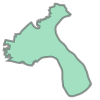

In [5]:
zipcodes.loc[0,'geometry']

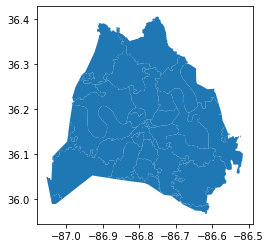

In [6]:
zipcodes.plot();

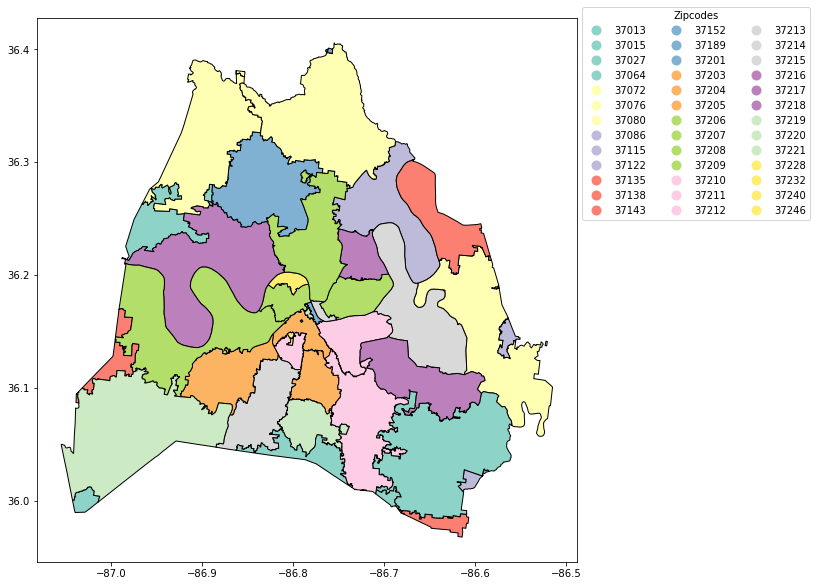

In [7]:
#geopandas handles legend styling if you pass a dict of keywords

leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [8]:
julyt_pkl = pd.read_pickle('../data/july_trips.pkl')
print(julyt_pkl.shape)
julyt_pkl.head()

(134926, 10)


pubTimeStamp tripRecordNum  \
0 2019-07-01 00:02:52.213       BRD5179   
1 2019-07-01 00:02:52.213       BRD5177   
2 2019-07-01 00:02:52.213       BRD5176   
3 2019-07-01 00:02:52.213       BRD5178   
4 2019-07-01 00:02:52.213       BRD5180   

                                           tripRoute        sumdID  \
0  [[36.177438,-86.751861],[36.177425,-86.751987]...  PoweredZSHKJ   
1    [[36.162718,-86.771102],[36.162718,-86.771102]]  Powered22JF6   
2  [[36.162734,-86.77122],[36.162706,-86.771325],...  Powered22JF6   
3                           [[36.152499,-86.798708]]  PoweredIB2CC   
4                           [[36.157523,-86.775794]]  PoweredW4G7R   

   tripDuration  tripDistance  startLatitude  endLatitude  startLongitude  \
0           2.0           0.0        36.1775      36.1778        -86.7516   
1           0.0           0.0        36.1627      36.1627        -86.7711   
2           1.0           0.0        36.1627      36.1627        -86.7713   
3           1.0           0.0        36.1525      36.1525        -86.7988   
4           2.0           0.0        36.1578      36.1575        -86.7760   

   endLongitude  
0      -86.7514  
1      -86.7711  
2      -86.7713  
3      -86.7988  
4      -86.7758

In [9]:
julyt_pkl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    134926 non-null  datetime64[ns]
 1   tripRecordNum   134926 non-null  object        
 2   tripRoute       134926 non-null  object        
 3   sumdID          134926 non-null  object        
 4   tripDuration    134926 non-null  float64       
 5   tripDistance    134926 non-null  float64       
 6   startLatitude   134926 non-null  float64       
 7   endLatitude     134926 non-null  float64       
 8   startLongitude  134926 non-null  float64       
 9   endLongitude    134926 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 10.3+ MB


In [10]:
julyt_pkl.loc[0].startLatitude

36.1775

In [11]:
julyt_pkl['geometry'] = julyt_pkl.apply(lambda x: Point((x.startLongitude, x.startLatitude)), 
                                        axis=1)
julyt_pkl.head(3)

pubTimeStamp tripRecordNum  \
0 2019-07-01 00:02:52.213       BRD5179   
1 2019-07-01 00:02:52.213       BRD5177   
2 2019-07-01 00:02:52.213       BRD5176   

                                           tripRoute        sumdID  \
0  [[36.177438,-86.751861],[36.177425,-86.751987]...  PoweredZSHKJ   
1    [[36.162718,-86.771102],[36.162718,-86.771102]]  Powered22JF6   
2  [[36.162734,-86.77122],[36.162706,-86.771325],...  Powered22JF6   

   tripDuration  tripDistance  startLatitude  endLatitude  startLongitude  \
0           2.0           0.0        36.1775      36.1778        -86.7516   
1           0.0           0.0        36.1627      36.1627        -86.7711   
2           1.0           0.0        36.1627      36.1627        -86.7713   

   endLongitude                  geometry  
0      -86.7514  POINT (-86.7516 36.1775)  
1      -86.7711  POINT (-86.7711 36.1627)  
2      -86.7713  POINT (-86.7713 36.1627)

In [12]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
julyt_scooter_geo = gpd.GeoDataFrame(julyt_pkl, 
                           crs = zipcodes.crs, 
                           geometry = julyt_pkl['geometry'])

In [14]:
type(julyt_pkl)

pandas.core.frame.DataFrame

In [15]:
type(julyt_scooter_geo)

geopandas.geodataframe.GeoDataFrame

In [16]:
julyt_scooter_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 134926 entries, 0 to 134925
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   pubTimeStamp    134926 non-null  datetime64[ns]
 1   tripRecordNum   134926 non-null  object        
 2   tripRoute       134926 non-null  object        
 3   sumdID          134926 non-null  object        
 4   tripDuration    134926 non-null  float64       
 5   tripDistance    134926 non-null  float64       
 6   startLatitude   134926 non-null  float64       
 7   endLatitude     134926 non-null  float64       
 8   startLongitude  134926 non-null  float64       
 9   endLongitude    134926 non-null  float64       
 10  geometry        134926 non-null  geometry      
dtypes: datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 11.3+ MB


In [17]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [18]:
stops_by_zip = gpd.sjoin(julyt_scooter_geo, zipcodes, op = 'within')

In [19]:
stops_by_zip.head(20)

pubTimeStamp tripRecordNum  \
0   2019-07-01 00:02:52.213       BRD5179   
26  2019-07-01 00:12:52.437       BRD5282   
118 2019-07-01 00:32:53.757       BRD5463   
170 2019-07-01 00:43:26.033         LFT62   
211 2019-07-01 00:52:54.660       BRD5629   
246 2019-07-01 00:54:49.553     LIM784856   
298 2019-07-01 00:59:55.983         LFT82   
302 2019-07-01 01:02:27.253         LFT86   
329 2019-07-01 01:03:16.823         SPI40   
330 2019-07-01 01:03:16.823         SPI35   
375 2019-07-01 01:12:55.593       BRD5792   
448 2019-07-01 01:27:56.253       BRD5930   
460 2019-07-01 01:32:56.520       BRD5977   
472 2019-07-01 01:32:56.520       BRD5976   
491 2019-07-01 01:37:56.663       BRD5994   
523 2019-07-01 01:47:57.287       BRD6103   
539 2019-07-01 01:52:57.520       BRD6112   
566 2019-07-01 01:54:50.083     LIM784903   
581 2019-07-01 01:54:50.123     LIM784916   
583 2019-07-01 01:54:50.130     LIM784917   

                                             tripRoute                sumdID  \
0    [[36.177438,-86.751861],[36.177425,-86.751987]...          PoweredZSHKJ   
26   [[36.176038,-86.76081],[36.175959,-86.760837],...          PoweredU1QWL   
118  [[36.178056,-86.755718],[36.177984,-86.75558],...          Powered3HZZV   
170  [[36.1774,-86.74989],[36.17743,-86.74994],[36....         Powered536423   
211    [[36.179298,-86.746625],[36.177447,-86.745683]]          PoweredTLSDM   
246          [[36.16885,-86.75574],[36.179,-86.74974]]  PoweredEL6C64ISVQT6R   
298  [[36.17315,-86.76498],[36.17317,-86.7649],[36....         Powered425222   
302  [[36.18248,-86.7357],[36.18257,-86.73567],[36....         Powered353469   
329  [[36.176265087012368,-86.7564405967358],[36.17...        Powered6837145   
330  [[36.176193798925887,-86.756442021659339],[36....        Powered4429487   
375  [[36.177391,-86.749753],[36.177362,-86.749781]...          PoweredXZKC9   
448  [[36.178502,-86.750485],[36.178547,-86.75052],...          Powered2ZJMT   
460  [[36.170935,-86.735264],[36.170933,-86.73521],...          PoweredMH4Y4   
472  [[36.172479,-86.740551],[36.172479,-86.740551]...          Powered1JQW4   
491  [[36.175698,-86.754799],[36.175698,-86.754799]...          Powered9SKTN   
523  [[36.177955,-86.757079],[36.177955,-86.757079]...          PoweredA52YE   
539  [[36.176595,-86.756032],[36.17664,-86.755928],...          PoweredT5FIG   
566  [[36.17739,-86.74983],[36.177440000000004,-86....  Powered7F7SGZH42ZGS7   
581  [[36.18382,-86.75003],[36.18382,-86.7500599999...  PoweredYDQW5ISWTRM6T   
583  [[36.18354,-86.74921],[36.18368,-86.74723],[36...  PoweredRITYZFWANFYXJ   

     tripDuration  tripDistance  startLatitude  endLatitude  startLongitude  \
0        2.000000      0.000000      36.177500    36.177800      -86.751600   
26       9.000000      0.000000      36.176000    36.175900      -86.760900   
118      4.000000      0.000000      36.178000    36.178100      -86.755800   
170      6.956550   1633.858320      36.177400    36.174040      -86.749890   
211     10.000000      0.000000      36.179200    36.179200      -86.746700   
246      8.000000   4099.961958      36.168846    36.178999      -86.755740   
298     29.678683  20009.843160      36.173150    36.164120      -86.764980   
302     13.874767   5807.086800      36.182480    36.190510      -86.735700   
329      7.000000   2788.714000      36.181374    36.176265      -86.749408   
330      9.000000   2808.399040      36.181364    36.176194      -86.749376   
375      7.000000      0.000000      36.177300    36.180700      -86.749800   
448     14.000000      0.000000      36.178500    36.178400      -86.750500   
460     36.000000  13451.444000      36.170900    36.175400      -86.735300   
472     32.000000  17388.452000      36.172500    36.172800      -86.740600   
491     13.000000      0.000000      36.176100    36.175600      -86.755200   
523     20.000000      0.000000      36.177900    36.178000      -86.757400   
539      4.000000      0.000000      36.17650

In [20]:
stops_by_zip['zip'].value_counts()

37203    65089
37201    26237
37219    11828
37212     6572
37208     5719
37213     4567
37206     4275
37204     3692
37210     3237
37240     1680
37207      588
37232      571
37209      524
37228       92
37216       62
37205       49
37246       46
37215       34
37211       30
37013       14
37217        5
37218        3
37221        3
37214        3
37220        2
37115        2
Name: zip, dtype: int64

In [21]:
stops_in_37207 = stops_by_zip.loc[stops_by_zip['zip'] == '37207']
stops_in_37207.shape

(588, 14)

In [22]:
polygon37207 = zipcodes.loc[zipcodes['zip'] == '37207']
polygon37207.shape

(2, 3)

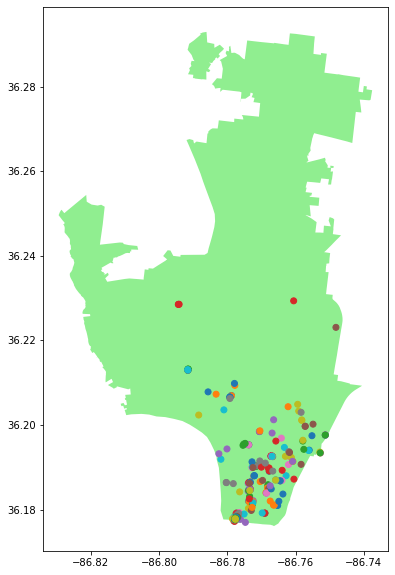

In [23]:
#fig, ax = matplotlib.subplots()
ax = polygon37207.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37207.plot( ax = ax, column = 'sumdID');
plt.show();

In [24]:
polygon37207.geometry.centroid

C:\Users\Joselit\AppData\Local\Temp/ipykernel_14156/3792774199.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37207.geometry.centroid


49    POINT (-86.77677 36.23245)
54    POINT (-86.78726 36.28724)
dtype: geometry

In [25]:
#find the center of the larger (more southern) polygon and look at it
center = polygon37207.geometry.centroid[49]
print(center)

POINT (-86.77676762469856 36.23245257407242)


C:\Users\Joselit\AppData\Local\Temp/ipykernel_14156/760013409.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37207.geometry.centroid[49]


In [26]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.23245257407242, -86.77676762469856]


In [27]:
stops_in_37206 = stops_by_zip.loc[stops_by_zip['zip'] == '37206']
stops_in_37206 = stops_in_37206[:800]
stops_in_37206.shape

(800, 14)

In [28]:
polygon37206 = zipcodes.loc[zipcodes['zip'] == '37206']
polygon37206.shape

(1, 3)

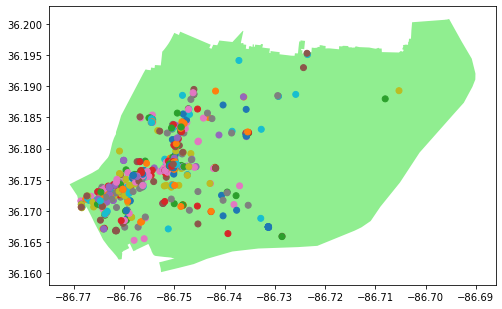

In [29]:
#fig, ax = matplotlib.subplots()
ax = polygon37206.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37206.plot( ax = ax, column = 'sumdID');
plt.show();

In [30]:
stops_in_37213 = stops_by_zip.loc[stops_by_zip['zip'] == '37213']
stops_in_37213 = stops_in_37213[:800]
stops_in_37213.shape

(800, 14)

In [31]:
polygon37213 = zipcodes.loc[zipcodes['zip'] == '37213']
polygon37213.shape

(1, 3)

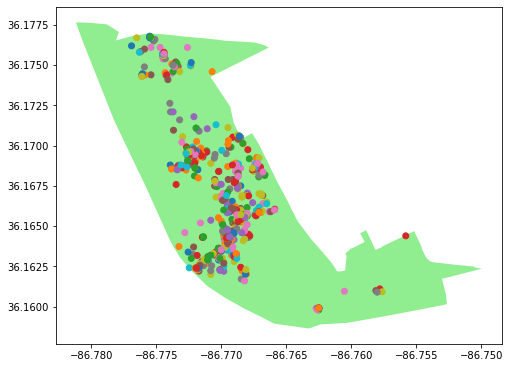

In [32]:
#fig, ax = matplotlib.subplots()
ax = polygon37213.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37213.plot( ax = ax, column = 'sumdID');
plt.show();

In [33]:
stops_in_37219 = stops_by_zip.loc[stops_by_zip['zip'] == '37219']
stops_in_37219 = stops_in_37219[:800]
stops_in_37219.shape

(800, 14)

In [34]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

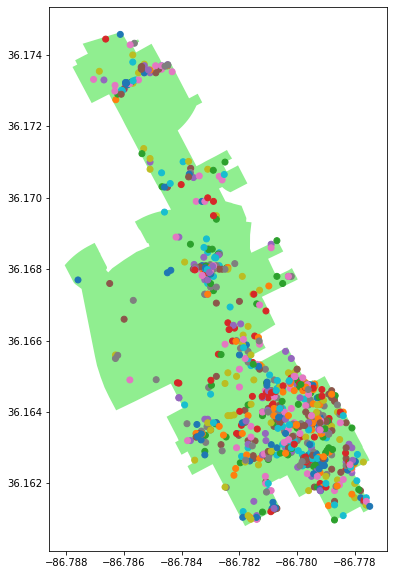

In [35]:
#fig, ax = matplotlib.subplots()
ax = polygon37219.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37219.plot( ax = ax, column = 'sumdID');
plt.show();

In [36]:
stops_in_37208 = stops_by_zip.loc[stops_by_zip['zip'] == '37208']
stops_in_37208 = stops_in_37208[:800]
stops_in_37208.shape

(800, 14)

In [37]:
polygon37208 = zipcodes.loc[zipcodes['zip'] == '37208']
polygon37208.shape

(1, 3)

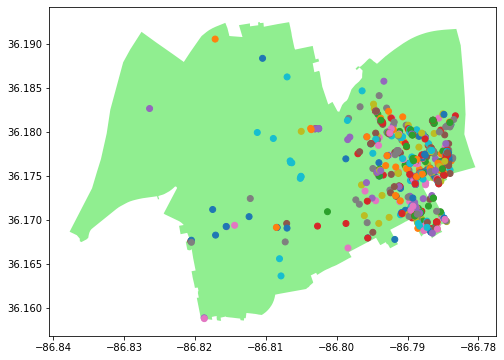

In [38]:
#fig, ax = matplotlib.subplots()
ax = polygon37208.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37208.plot( ax = ax, column = 'sumdID');
plt.show();

In [39]:
stops_in_37209 = stops_by_zip.loc[stops_by_zip['zip'] == '37209']
stops_in_37209.shape

(524, 14)

In [40]:
polygon37209 = zipcodes.loc[zipcodes['zip'] == '37209']
polygon37209.shape

(1, 3)

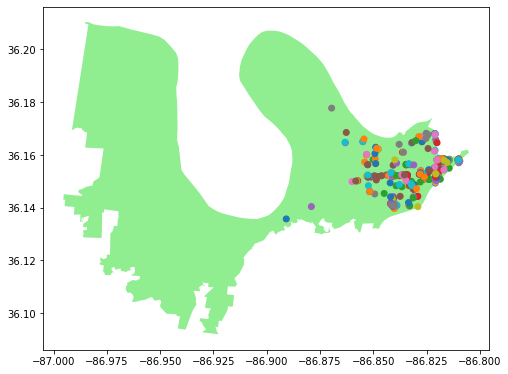

In [41]:
#fig, ax = matplotlib.subplots()
ax = polygon37209.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37209.plot( ax = ax, column = 'sumdID');
plt.show();

In [42]:
stops_in_37240 = stops_by_zip.loc[stops_by_zip['zip'] == '37240']
stops_in_37240 = stops_in_37240[:800]
stops_in_37240.shape

(800, 14)

In [43]:
polygon37240 = zipcodes.loc[zipcodes['zip'] == '37240']
polygon37240.shape

(1, 3)

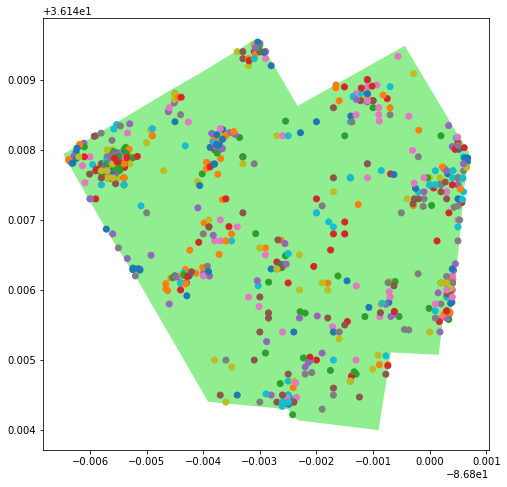

In [44]:
#fig, ax = matplotlib.subplots()
ax = polygon37240.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37240.plot( ax = ax, column = 'sumdID');
plt.show();

In [45]:
stops_in_37212 = stops_by_zip.loc[stops_by_zip['zip'] == '37212']
stops_in_37212 = stops_in_37212[:800]
stops_in_37212.shape

(800, 14)

In [46]:
polygon37212 = zipcodes.loc[zipcodes['zip'] == '37212']
polygon37212.shape

(1, 3)

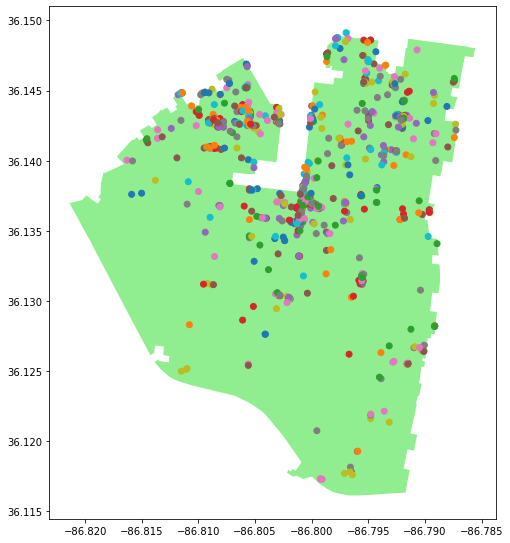

In [47]:
#fig, ax = matplotlib.subplots()
ax = polygon37212.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37212.plot( ax = ax, column = 'sumdID');
plt.show();

In [48]:
stops_in_37210 = stops_by_zip.loc[stops_by_zip['zip'] == '37210']
stops_in_37210 = stops_in_37210[:800]
stops_in_37210.shape

(800, 14)

In [49]:
polygon37210 = zipcodes.loc[zipcodes['zip'] == '37210']
polygon37210.shape

(1, 3)

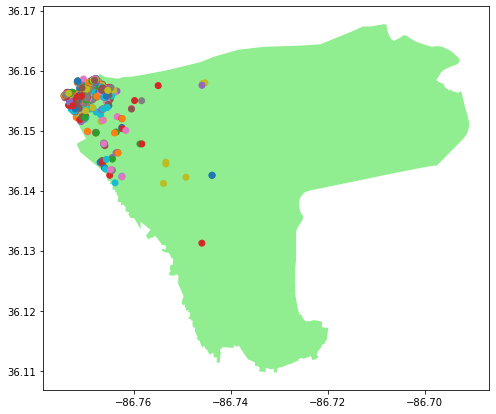

In [50]:
#fig, ax = matplotlib.subplots()
ax = polygon37210.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37210.plot( ax = ax, column = 'sumdID');
plt.show();

In [51]:
stops_in_37201 = stops_by_zip.loc[stops_by_zip['zip'] == '37201']
stops_in_37201 = stops_in_37201[:800]
stops_in_37201.shape

(800, 14)

In [52]:
polygon37201 = zipcodes.loc[zipcodes['zip'] == '37201']
polygon37201.shape

(1, 3)

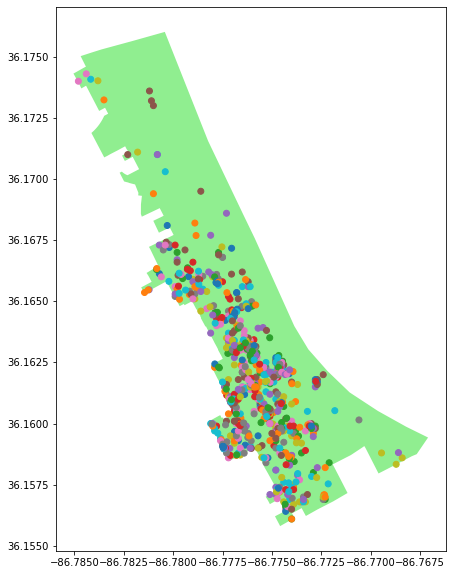

In [53]:
#fig, ax = matplotlib.subplots()
ax = polygon37201.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37201.plot( ax = ax, column = 'sumdID');
plt.show();

In [54]:
stops_in_37228 = stops_by_zip.loc[stops_by_zip['zip'] == '37228']
stops_in_37228.shape

(92, 14)

In [55]:
polygon37228 = zipcodes.loc[zipcodes['zip'] == '37228']
polygon37228.shape

(1, 3)

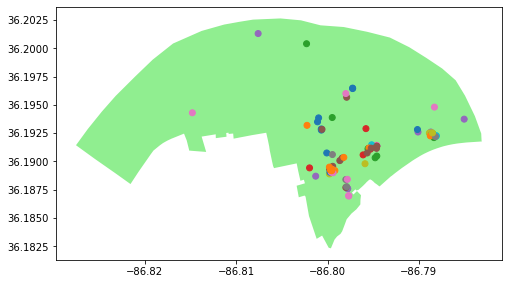

In [56]:
#fig, ax = matplotlib.subplots()
ax = polygon37228.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37228.plot( ax = ax, column = 'sumdID');
plt.show();

In [57]:
stops_in_37232 = stops_by_zip.loc[stops_by_zip['zip'] == '37232']
stops_in_37232 = stops_in_37232[:800]
stops_in_37232.shape

(571, 14)

In [58]:
polygon37232 = zipcodes.loc[zipcodes['zip'] == '37232']
polygon37232.shape

(1, 3)

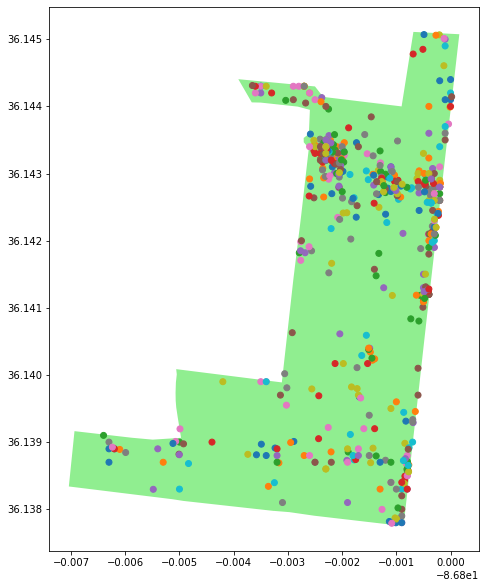

In [59]:
#fig, ax = matplotlib.subplots()
ax = polygon37232.plot(figsize = (8, 10), color = 'lightgreen')
stops_in_37232.plot( ax = ax, column = 'sumdID');
plt.show();

In [60]:
#create our map of Nashville Zip Code 37207 and show it
map_37207 = folium.Map(location =  area_center, zoom_start = 12)
map_37207

In [61]:
i = 0
for row_index, row_values in stops_in_37207.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 17
values are:
 
pubTimeStamp                             2019-07-01 00:12:52.437000
tripRecordNum                                               BRD5284
tripRoute         [[36.17849,-86.777107],[36.178499,-86.77709],[...
sumdID                                                 PoweredIQ2DB
tripDuration                                                   10.0
tripDistance                                                    0.0
startLatitude                                               36.1784
endLatitude                                                 36.1782
startLongitude                                             -86.7772
endLongitude                                               -86.7774
geometry                         POINT (-86.77719999999999 36.1784)
index_right                                                      49
zip                                                           37207
po_name                                                   NASHVILLE
Name: 17, dtype: objec

In [62]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
#map_37215.save('../maps/map37215.html')

#display our map
map_37207

In [63]:
folium.Map?

In [64]:
cluster_map_37207 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37207)

folium.GeoJson(polygon37207).add_to(cluster_map_37207)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue", prefix='fa')
    
    marker = folium.Marker(location = loc, popup = pop, icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
#cluster_map_37215.save('../maps/cluster37215.html')

cluster_map_37207  

In [65]:
stops_in_37203 = stops_by_zip.loc[stops_by_zip['zip'] == '37203']
stops_in_37203 = stops_in_37203[:800]
stops_in_37203.shape

(800, 14)

In [66]:
polygon37203 = zipcodes.loc[zipcodes['zip'] == '37203']
polygon37203.shape

(1, 3)

In [67]:
stops_in_37215 = stops_by_zip.loc[stops_by_zip['zip'] == '37215']
stops_in_37215.shape

(34, 14)

In [68]:
polygon37215 = zipcodes.loc[zipcodes['zip'] == '37215']
polygon37215.shape

(1, 3)

In [69]:
stops_in_37219 = stops_by_zip.loc[stops_by_zip['zip'] == '37219']
stops_in_37219 = stops_by_zip[:800]
stops_in_37219.shape

(800, 14)

In [70]:
polygon37219 = zipcodes.loc[zipcodes['zip'] == '37219']
polygon37219.shape

(1, 3)

In [71]:
#draw our zip code area: 37215
map_37215 = folium.Map(location =  area_center, zoom_start = 11, control_scale=True)

folium.GeoJson(polygon37215).add_to(map_37215)
folium.GeoJson(polygon37203).add_to(map_37215)
folium.GeoJson(polygon37207).add_to(map_37215)
folium.GeoJson(polygon37206).add_to(map_37215)
folium.GeoJson(polygon37213).add_to(map_37215)
folium.GeoJson(polygon37219).add_to(map_37215)
folium.GeoJson(polygon37208).add_to(map_37215)
folium.GeoJson(polygon37209).add_to(map_37215)
folium.GeoJson(polygon37240).add_to(map_37215)
folium.GeoJson(polygon37212).add_to(map_37215)
folium.GeoJson(polygon37210).add_to(map_37215)
folium.GeoJson(polygon37201).add_to(map_37215)
folium.GeoJson(polygon37228).add_to(map_37215)
folium.GeoJson(polygon37232).add_to(map_37215)

#create a list of locations and pass them to FastMarkerCluster()
locations = stops_in_37215[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #GreenHills

locations = stops_in_37203[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#WestEnd, CentennialPark, Broadway, Demonbreum, Fairgrounds,GulchWest

locations = stops_in_37207[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#DickersonPike, ClevelandPark

locations = stops_in_37206[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#EastNashville

locations = stops_in_37213[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#TitansStadium

locations = stops_in_37219[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#StateCapitol

locations = stops_in_37208[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#NorthNashville, Temple Cementary

locations = stops_in_37209[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#TSU, JohnTuneAirport

locations = stops_in_37240[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Vanderbilt Campus

locations = stops_in_37212[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#Belmont

locations = stops_in_37210[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Trevecca, GulchEast

locations = stops_in_37201[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations))#RiverFront, lowerBroadway, PublicSquare

locations = stops_in_37228[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #MetroCenter, TedRhodesFields

locations = stops_in_37232[['startLatitude', 'startLongitude']].values.tolist()
map_37215.add_child(FastMarkerCluster(locations)) #Vanderbilt Hosp


#display our map
map_37215

In [72]:
#draw our zip code area: 37207
map_37207 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37207).add_to(map_37207)
folium.GeoJson(polygon37215).add_to(map_37207)
folium.GeoJson(polygon37203).add_to(map_37207)
folium.GeoJson(polygon37206).add_to(map_37207)
folium.GeoJson(polygon37219).add_to(map_37207)
folium.GeoJson(polygon37203).add_to(map_37207)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37207.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    
for row_index, row_values in stops_in_37215.iterrows():
    loc = [row_values['startLatitude'], row_values['startLongitude']]
    pop = str(row_values['sumdID'])
    icon=folium.Icon(color="blue",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37207)
    

#map_37215.save('../maps/map37215.html')

#display our map
map_37207